# <center> Beyond Modern Portfolio Theory </center>
### <center> Zhangyi Hu </center>
<br>


# <center> Contents </center>
- Overview on Markowitz mean variance model (MPT)
- Stochastic Dominance and risk measure
- Stochastic programming approach
- Python package PyMCEF

# <center> Modern Portfolio Theory </center>


- Introduced by Harry Markowitz in 1952, lead to Nobel price in economics
- Portfolio selection is based the first two moments of the random return
- Also known as mean variance model

# <center> Mean Variance Model </center>
- $X(w)$: random return as a function of weight vector $w$
- $\mathrm{Reward}(w)$: $\mathbb{E}\left[X(w)\right]$, mean
- $\mathrm{Risk}(w)$: $\mathrm{Var}\left[X(w)\right]$, variance
- Efficient portfolio: portfolio with risk miminimized subject to reward requirement

# <center> Mean Variance Model </center>
- Efficient portfolio: portfolio with risk miminimized subject to reward requirement

\begin{align*}
\underset{w}{\mathrm{argmin}}\quad & \mathrm{Risk}\left(w\right)\\
\mathrm{subject\ to}\quad & -\mathrm{Reward}\left(w\right)+c\le0\\
 & \sum_{i}w_{i}=1
\end{align*}

# <center> Mean Variance Model </center>
- Equivalent problem:

\begin{align*}
\underset{w}{\mathrm{argmin}}\quad & \mathrm{Risk}\left(w\right)-\lambda\mathrm{Reward}\left(w\right)\\
\mathrm{subject\ to}\quad & \sum_{i}w_{i}=1
\end{align*}

- Efficient frontier: the set of all solutions of $w$ with $\lambda \in [0, +\infty)$
- It is a continuum 

# <center> Mean Variance Model </center>

- The Lagrangian multiplier $\lambda$ is called risk tolerance in finance

| $\lambda = 0 $ | $\lambda = +\infty$ |
| :------------: | :-----------------: |
| $c = -\infty$ |  $c=c_\mathrm{max}, w_i=1$ for one $i$  |
| Most risk-averse | Most risk-seeking   |

- The choice of $\lambda$ can be based on other criteria, e.g. (Sharpe Ratio)

# <center> Mean Variance Model </center>
- Quadratic programming
- Suppose the mean and covariance of the $N$ assets is $\mu$ and $\Sigma$
- Objective function:
$$w^{T}\Sigma w-\lambda\mu^{T}w$$

- Constraint:
$$\sum_i^N w_i = 1$$

- Additional constraint can be added as business decision or for regularization purpose ($L_1, L_2$ etc.)

# <center> Limitations of Mean Variance Model </center>
- Following Karl Borch's example (1969, J. Economic Studies)
- Consider the investment universe with 3 assets,
- with mean return vector:

$$ \mu = \left[1,2,3\right]^T $$

- and the covariance matrix:

$$\Sigma=\left[\begin{array}{ccc}
1 & 0 & 0\\
0 & 4 & 0\\
0 & 0 & 9
\end{array}\right]$$

# <center> Limitations of Mean Variance Model </center>
- Let's consider long position only
- Efficient frontier can be obtained by solving the following quadratic programming problem:

\begin{align*}
\underset{w}{\mathrm{argmin}}\quad & w^{T}\Sigma w\\
\mathrm{subject\ to}\quad & \left[\begin{array}{ccc}
1 & 1 & 1\\
1 & 2 & 3
\end{array}\right]w=\left[\begin{array}{c}
1\\
a
\end{array}\right]\\
 & w_{i}\ge0,\quad i=1,2,3
\end{align*}
with $a$ varying from $1$ to $3$

Let's use python package cvxopt to obtain the efficient frontier

In [48]:
from cvxopt import solvers, matrix, spdiag
from numpy import linspace, random
solvers.options['show_progress'] = False
solvers.options['abstol'] = 1e-10
solvers.options['reltol'] = 1e-9
solvers.options['feastol'] = 1e-10
P = spdiag([1.0, 4.0, 9.0])
q = matrix([0.0, 0.0, 0.0])
G = -1.0 * spdiag([1.0, 1.0, 1.0])
h = matrix([0.0, 0.0, 0.0])
A = matrix([1.0, 1.0, 1.0, 2.0, 1.0, 3.0], (2, 3))
Rs_ef, Vs_ef, Rs, Vs = linspace(1.0, 3.0, 100), [], [], []
for R in Rs_ef:
    b = matrix([1.0, R])
    sol = solvers.qp(2.0 * P, q, G=G, h=h, A=A, b=b)
    Vs_ef.append(sol['primal objective'])
    ws = random.uniform(0.0, 1.0, 3)
    ws = ws / sum(ws)
    Rs.append(ws.dot([1.0, 2.0, 3.0]))
    Vs.append((ws*ws).dot([1.0, 4.0, 9.0]))

Plot the efficient frontier

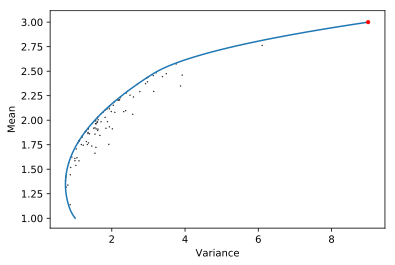

In [53]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.plot(Vs_ef, Rs_ef)
plt.xlabel('Variance')
plt.ylabel('Mean')
plt.scatter(Vs, Rs, s=0.2, c='k')
fig = plt.scatter(9.0, 3.0, s=10, c='r', zorder = 3)

# <center> Limitations of Mean Variance Model </center>
- MPT declares that we should be indifferent on the choices of portfolios on efficient frontier
- On the efficient frontier, higher return always require higher risk (variance) as a cost
- Different choices on efficient portfolio is only due to risk pereference 

# <center> Limitations of Mean Variance Model </center>

- However, let's take a look at one possible return distribution with the required moments

| $P$ | $0.5$ | $0.5$ |
| :------: | :------: | :------: |
| $X_1$ | $0$ | $2$ |
| $X_2$ | $0$ | $4$ |
| $X_3$ | $0$ | $6$ |

- You don't need any math knowledge to get the obvious best portfolio, all in with $X_3$
- How come we got a continuum of other choices equally attractive as this one?

# <center> Limitations of Mean Variance Model </center>
- The problem comes from variance as the risk measure
- Over performance is resented equally as under performance
- We want a more sophisticated risk measure, using the distribution, not just its first two moments
- The risk reward utility approach is not enough to axiomatize the portfolio pereference

# <center> Stochastic Dominance and risk measure </center>

- Preference can be axiomatized by ordering on the set of all decisions
- An obvious choice is the partial ordering on the portfolio random return

### Introduction

Suppose there are $N$ assets available for investment. 
A portfolio associated with that is a vector with $N$ elements, summing up to 1. 
The set of all possible portfolio is defined as:

$$\mathcal{W}=\left\{ \boldsymbol{w}:\,\boldsymbol{w}\in R^{N},\sum_{n=1}^{N}w_{n}=1\right\}$$ 

Let's denote the realization of the percentage return of all $N$ assets as a vector $\boldsymbol{Y}$.
Then the Reward of this portfolio is defined as its expected return.

$$E[X(\boldsymbol{w})]=E[\boldsymbol{Y}\cdot\boldsymbol{w}]=E[\sum_{n=1}^{N}w_{n}Y_{n}]$$

A portfolio is called efficient, if, with its reward fixed, the risk is minimized, or with its risk fixed, the reward is maximized. 
The set of all possible efficient portfolios for given $\boldsymbol{Y}$ is defined as the efficient frontier. 
$\boldsymbol{Y}$ can be formulated from a distribution, (e.g. by providing the means and covariance matrix). The distribution can be provided by various methods, with certain assumptions made.